<a href="https://colab.research.google.com/github/RyuuKenshi/Mental-Health-and-Suicides/blob/master/Mental_Health_Illness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd 

import matplotlib.pylab as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

import seaborn as sns
sns.set(style="ticks")
sns.set(rc={'figure.figsize':(15,10)})

In [40]:
wh = pd.read_csv('https://raw.githubusercontent.com/RyuuKenshi/Mental-Health-and-Suicides/master/datasets/who_suicide_statistics.csv')

In [19]:
wh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [41]:
wh.dropna(inplace=True)
wh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36060 entries, 24 to 43763
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      36060 non-null  object 
 1   year         36060 non-null  int64  
 2   sex          36060 non-null  object 
 3   age          36060 non-null  object 
 4   suicides_no  36060 non-null  float64
 5   population   36060 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.9+ MB


In [21]:
wh.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population'], dtype='object')

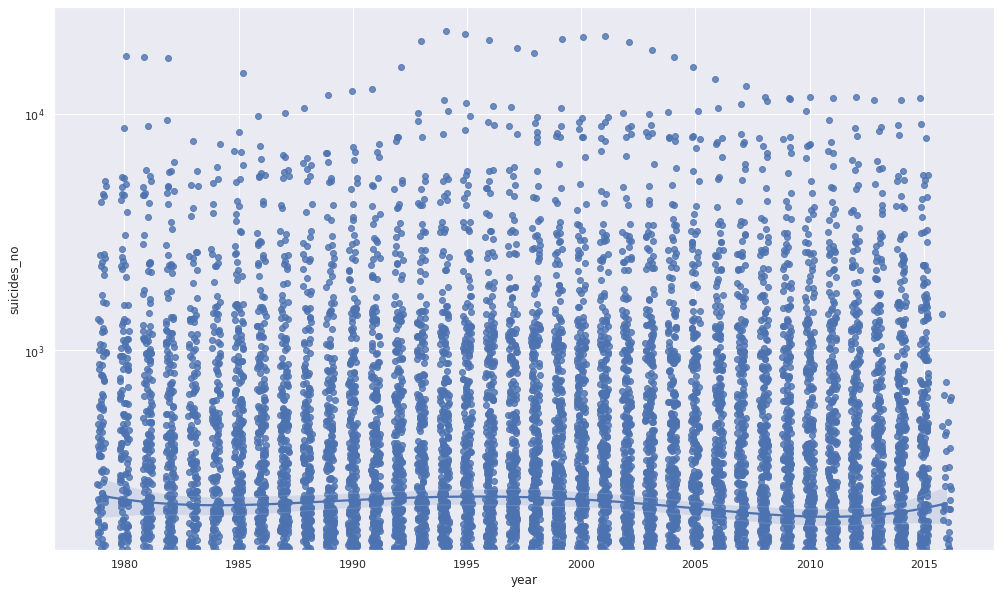

In [42]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,10)})
ax=sns.regplot(data=wh, x='year', y='suicides_no', x_jitter=0.2, order=4)
ax.set_yscale('log')

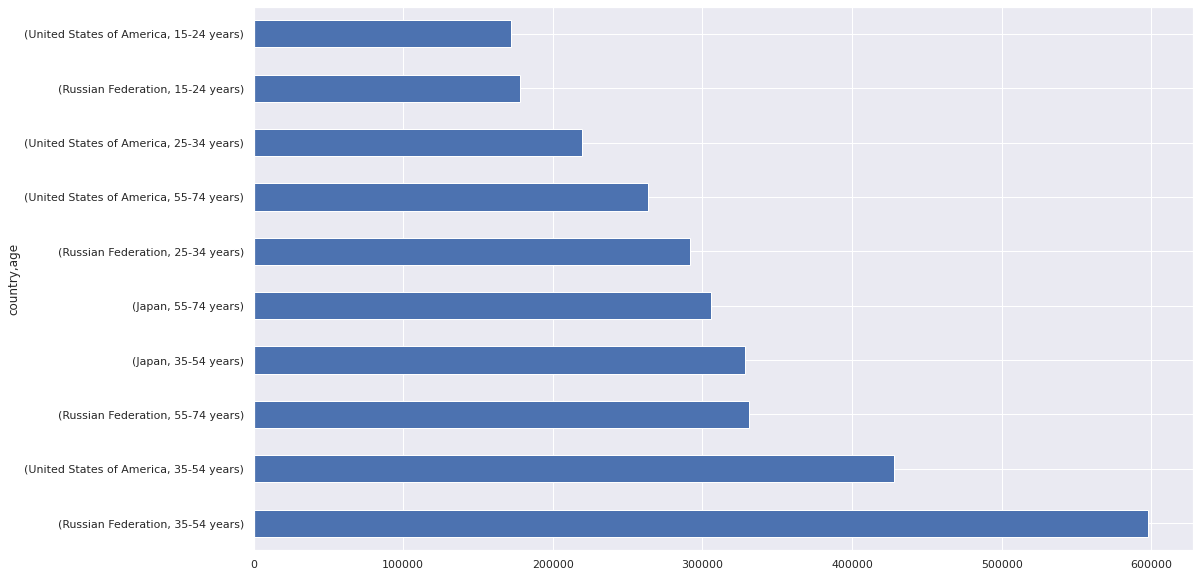

In [43]:
wh.groupby(['country','age']).suicides_no.sum().nlargest(10).plot(kind='barh')

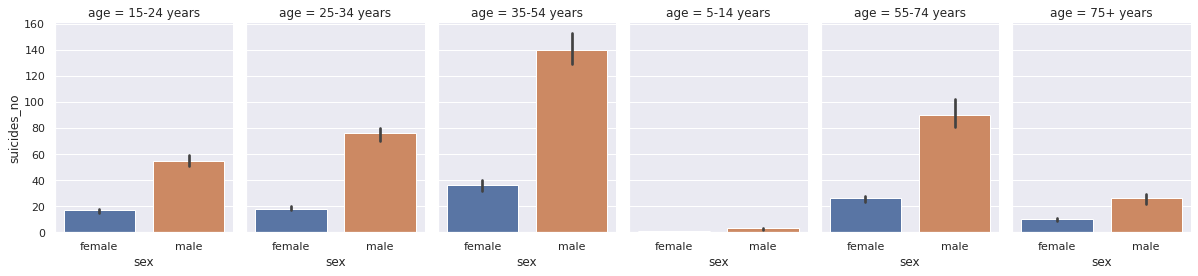

In [44]:
ax = sns.catplot(x="sex", y="suicides_no",col='age', data=wh, estimator=np.median,height=4, aspect=.7,kind='bar')

In [46]:
wh['age'] = wh.age.astype(pd.api.types.CategoricalDtype(categories = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']))

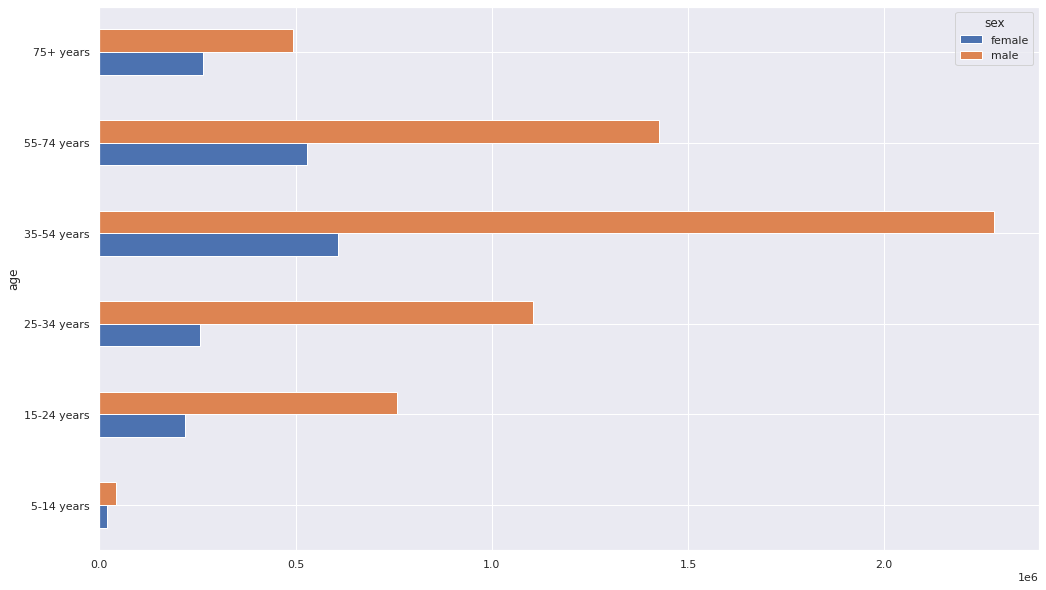

In [47]:
wh.pivot_table(index='age',columns='sex',values='suicides_no', aggfunc='sum').plot(kind='barh')

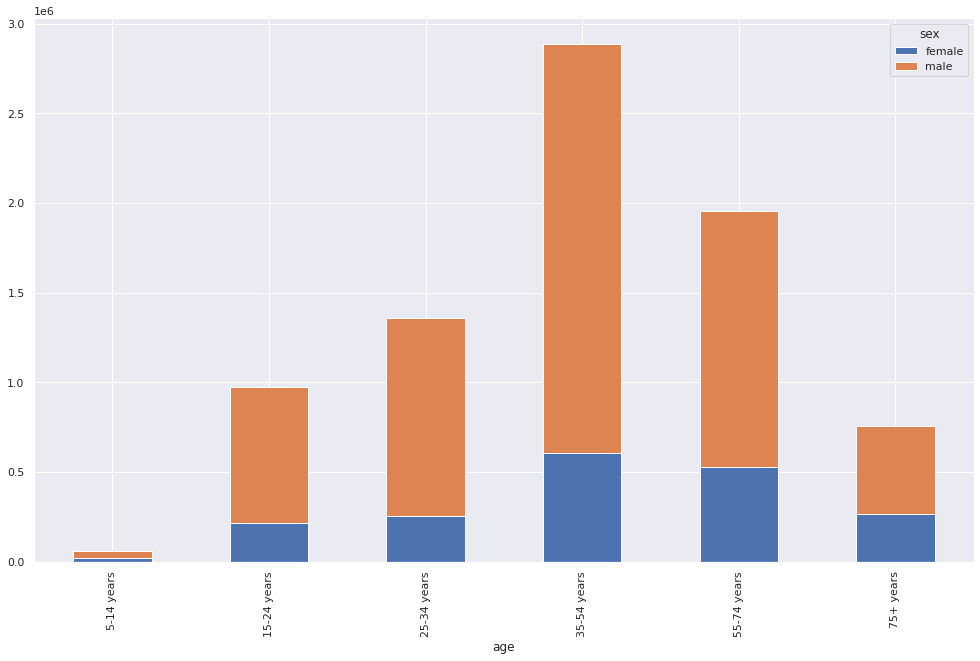

In [48]:
wh.groupby(by=['age','sex'])['suicides_no'].sum().unstack().plot(kind='bar',stacked=True)

In [49]:
wh.groupby(by=['age','sex'])['suicides_no'].sum().unstack().reset_index().melt(id_vars='age')

,age,sex,value
0,5-14 years,female,20152.0
1,15-24 years,female,218309.0
2,25-34 years,female,256427.0
3,35-54 years,female,607420.0
4,55-74 years,female,528359.0
5,75+ years,female,263627.0
6,5-14 years,male,42168.0
7,15-24 years,male,757391.0
8,25-34 years,male,1104353.0
9,35-54 years,male,2280320.0


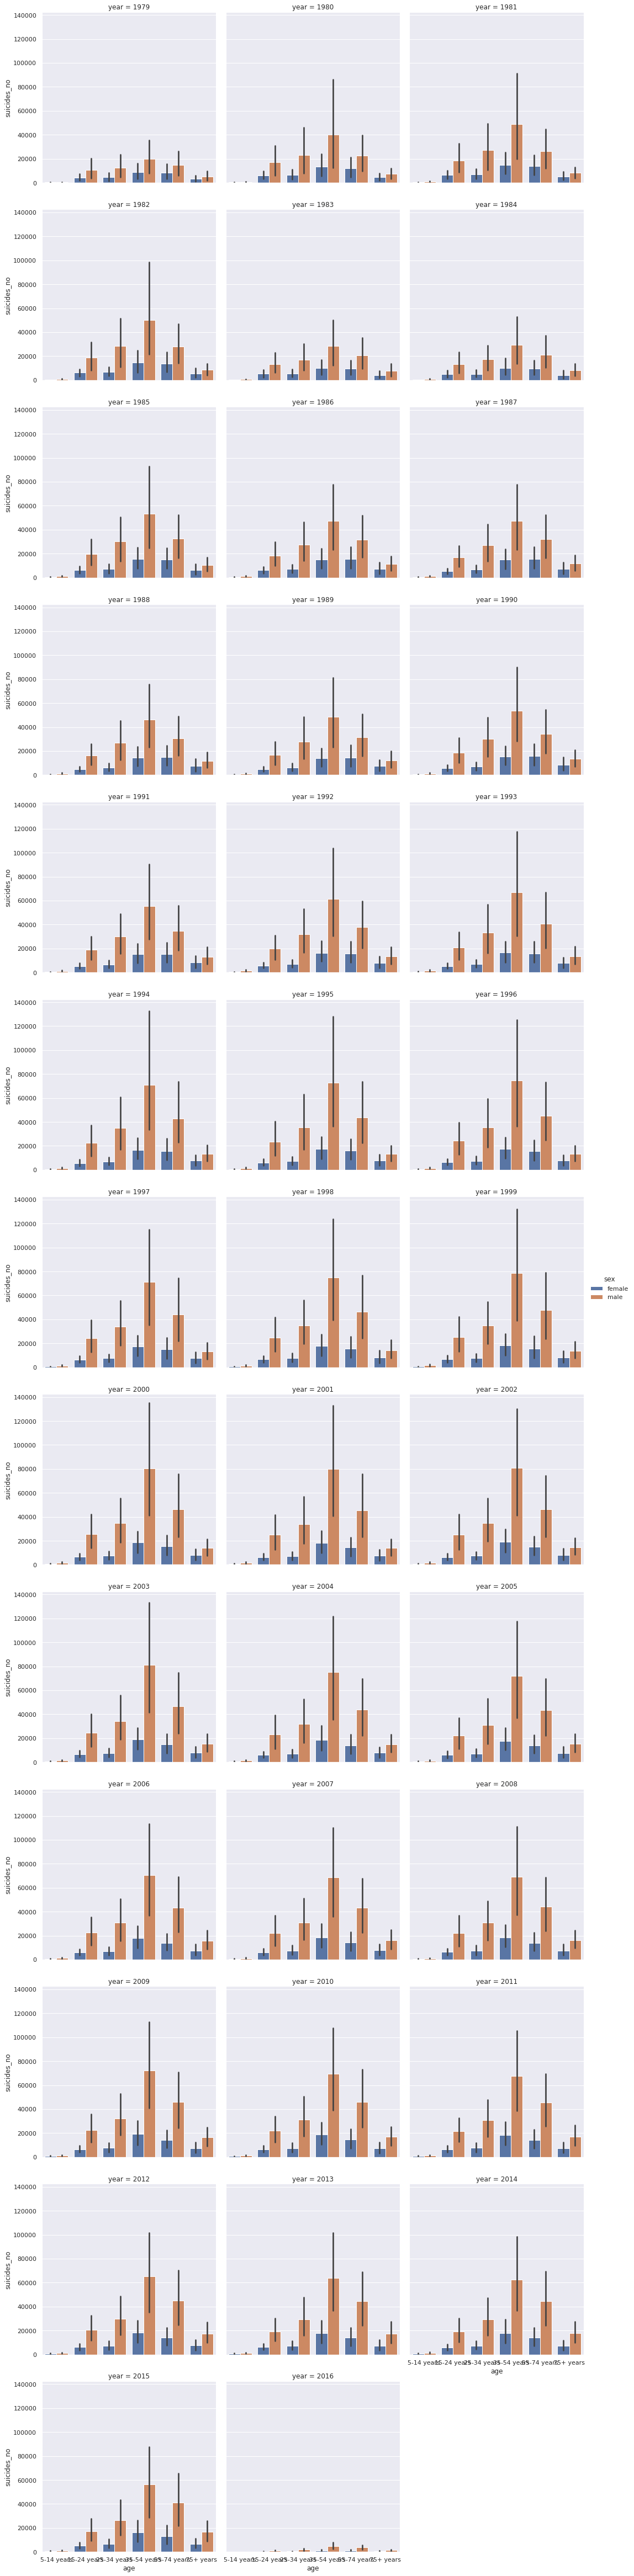

In [29]:
sns.catplot('age','suicides_no',hue='sex',col='year',data=wh,kind='bar',col_wrap=3,estimator=np.sum)

In [ ]:
from matplotlib.colors import LogNorm

df = wh.groupby(['year','age']).suicides_no.sum().reset_index()
df['age'] = df.age.astype(pd.api.types.CategoricalDtype(categories = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']))
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot('year','suicides_no',hue='age',style='age',data=df,hue_norm=LogNorm(),palette="ch:2.5,.25",sort=False)